# Analysis of game Zabijaci
(name credit: Žofka)

## Game description
Zabijaci is a game for $2-n$ players. At the start of the game, each player gets randomly a target which they need to kill. They kill them by coming to them, touching their shoulder and telling them "You have been killed". If there is someone who sees a player being killed, they shout "I saw it!" and the kill does not count. The killed player then gives their target to the killer. The game ends after a certain amount of time<sup>1</sup>. The winner is the player who killed the most people.
Player cannot have themselves as a target.

<sup>1</sup> It cannot end with only one survivor because the last two players would have each other as targets.

## Game Details

* If there are two players who kill each other (i.e., player A has target B and B has target A), they both die.
* Killer having themselves as a target is not allowed by the rules (i.e., player A has target A).

## The Analysis

We can model the game using a directed graph as $G = (V, E)$, where the vertex set $V$ represents players ($|V| = n$) and the edge set $E$ represents targetting. Formally, if $u, v \in V, (u, v) \in E$, then player $u$ has to kill player $v$.
The rules imply that the in and out degree of any vertex is $1$.

It can be trivially proven (by induction on the number of vertices) that such a graph $G$ contains only cycles as subgraphs in its connected components.

With this in mind, we can proceed to the analysis.

First, we generate some games and look at their cycles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Local imports
from game import generate_data, shuffle_from_box

sns.set_theme()

players_count = 60
games_count = 100000
data = generate_data(games_count, players_count)
# data = generate_data(games_count, players_count, shuffle_func=shuffle_from_box)

data.head()

,cycles_count,cycle_1,cycle_2,cycle_3,cycle_4,cycle_5,cycle_6,cycle_7,cycle_8,cycle_9,...,cycle_51,cycle_52,cycle_53,cycle_54,cycle_55,cycle_56,cycle_57,cycle_58,cycle_59,cycle_60
0,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


The table above shows the count of cycles in every game (`cycles_count`).
`cycle_x` shows the amount of cycles in a game with cycle size $x$<sup>1</sup>.

<sup>1</sup> By cycle size $x$, we mean there are $x$ vertices in the cycle.

We look at the data description. What is interesting to see is that on average, there are only 3-4 cycles per game.

In [2]:
data.describe()

,cycles_count,cycle_1,cycle_2,cycle_3,cycle_4,cycle_5,cycle_6,cycle_7,cycle_8,cycle_9,...,cycle_51,cycle_52,cycle_53,cycle_54,cycle_55,cycle_56,cycle_57,cycle_58,cycle_59,cycle_60
count,100000.000000,100000.0,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000
mean,3.695740,0.0,0.497720,0.33463,0.249040,0.200030,0.165990,0.14328,0.124760,0.111050,...,0.019600,0.019140,0.019120,0.01767,0.017990,0.017980,0.016540,0.023010,0.0,0.045420
std,1.447697,0.0,0.702495,0.57941,0.497254,0.449778,0.407969,0.37912,0.352982,0.333015,...,0.138622,0.137018,0.136947,0.13175,0.132916,0.132879,0.127541,0.149936,0.0,0.208225
min,1.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,3.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,4.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,5.000000,0.0,1.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,11.000000,0.0,5.000000,6.00000,4.000000,4.000000,4.000000,4.00000,3.000000,4.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


## Cycle counts


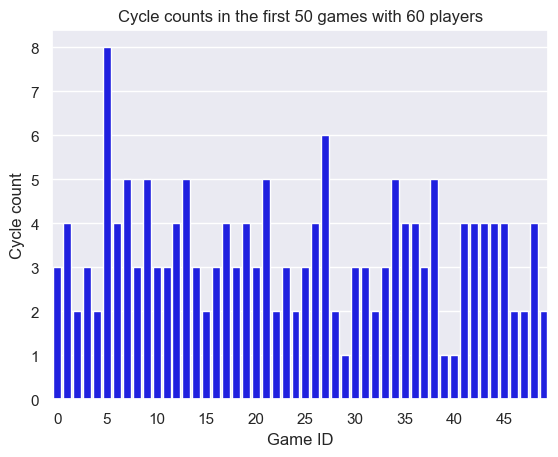

In [8]:
take_first_n_games = 50
data_cut = data.iloc[:take_first_n_games]
ax = sns.barplot(x=data_cut.index, y="cycles_count", data=data_cut)

ax.set_title(
    f"Cycle counts in the first {take_first_n_games} games with {players_count} players"
)
ax.set_xlabel("Game ID")
ax.set_ylabel("Cycle count")

# Show every 5th game
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)

### Cycles distribution

We look at the distribution of cycles.

In [4]:
from game import count_cycles

cycles = count_cycles(data)
print(len(cycles))
# cycles[i] = number of cycles of size (i + 1)
print(cycles)

60
[0, 49772, 33463, 24904, 20003, 16599, 14328, 12476, 11105, 9925, 9118, 8465, 7669, 7179, 6496, 6414, 5910, 5582, 5289, 4980, 4824, 4496, 4378, 4215, 4010, 3783, 3658, 3513, 3546, 3429, 3253, 3179, 2930, 2879, 2859, 2764, 2724, 2660, 2545, 2599, 2483, 2368, 2308, 2363, 2175, 2118, 2078, 2058, 2059, 1996, 1960, 1914, 1912, 1767, 1799, 1798, 1654, 2301, 0, 4542]


In [6]:
cycles_sum = sum(cycles)

# Print percentages
for i, c in enumerate(cycles):
    percent = c / cycles_sum * 100
    print(f"{i + 1} : {percent:.2f}%")

1 : 0.00%
2 : 13.47%
3 : 9.05%
4 : 6.74%
5 : 5.41%
6 : 4.49%
7 : 3.88%
8 : 3.38%
9 : 3.00%
10 : 2.69%
11 : 2.47%
12 : 2.29%
13 : 2.08%
14 : 1.94%
15 : 1.76%
16 : 1.74%
17 : 1.60%
18 : 1.51%
19 : 1.43%
20 : 1.35%
21 : 1.31%
22 : 1.22%
23 : 1.18%
24 : 1.14%
25 : 1.09%
26 : 1.02%
27 : 0.99%
28 : 0.95%
29 : 0.96%
30 : 0.93%
31 : 0.88%
32 : 0.86%
33 : 0.79%
34 : 0.78%
35 : 0.77%
36 : 0.75%
37 : 0.74%
38 : 0.72%
39 : 0.69%
40 : 0.70%
41 : 0.67%
42 : 0.64%
43 : 0.62%
44 : 0.64%
45 : 0.59%
46 : 0.57%
47 : 0.56%
48 : 0.56%
49 : 0.56%
50 : 0.54%
51 : 0.53%
52 : 0.52%
53 : 0.52%
54 : 0.48%
55 : 0.49%
56 : 0.49%
57 : 0.45%
58 : 0.62%
59 : 0.00%
60 : 1.23%


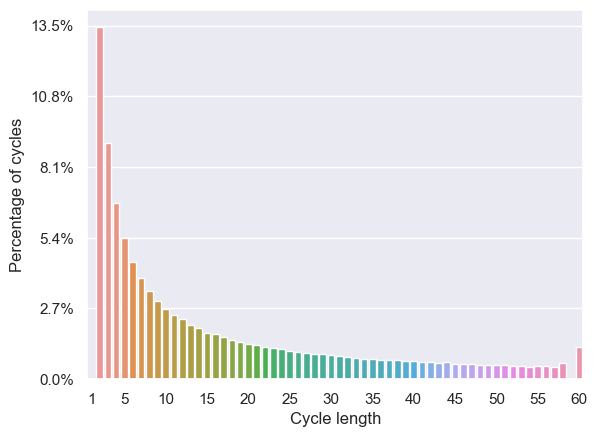

In [7]:
import matplotlib.ticker as mtick

# Plot cycles
# x axis: cycle length
# y axis: cycle count
ax = sns.barplot(x=[_ for _ in range(1, players_count + 1)], y=cycles)

# Set labels
ax.set(xlabel="Cycle length", ylabel="Percentage of cycles")

# Set every 5th label to be visible
for i, label in enumerate(ax.xaxis.get_ticklabels()):
    if i % 5 != 4 and i != 0:
        label.set_visible(False)

# Format y axis to percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=cycles_sum))

In the picture above, we can see cycles distribution after $10^5$ games with $n=60$ players.

We can look at it in the following way: "What is the probability of cycle of size $x$ to be in a game of $n$ players?"